# 预训练模型预测-视觉定位 Visual Grounding

同济子豪兄 2023-6-23

## 导入工具包

In [16]:
from mmpretrain import list_models, inference_model
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

## 查找图像描述算法

In [2]:
list_models(task='Visual Grounding')

['blip-base_8xb16_refcoco', 'ofa-base_3rdparty-finetuned_refcoco']

## 推理预测

In [3]:
# 待输入图像路径
img_path = 'mmpretrain/demo/cat-dog.png'

In [4]:
# 模型
model = 'ofa-base_3rdparty-finetuned_refcoco'

In [31]:
# 要定位的视觉语义
# visual_grounding = 'cat'

visual_grounding = 'dog'

In [32]:
# 推理预测
result = inference_model(model, img_path, visual_grounding)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmclassification/v1/ofa/ofa-base_3rdparty_refcoco_20230418-2797d3ab.pth


In [33]:
result

{'pred_bboxes': tensor([[ 36.6000,  29.6000, 355.8000, 395.2000]])}

## 可视化预测结果

In [34]:
img_bgr = cv2.imread(img_path)

In [35]:
for each in result['pred_bboxes'].cpu().numpy().astype('uint32'):
    img_bgr = cv2.rectangle(img_bgr,(each[0], each[1]),(each[2], each[3]), (0, 0, 255), 3)

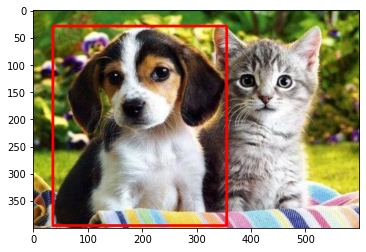

In [36]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()